In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# To load the environment variable defined in the .env file
from dotenv import load_dotenv
load_dotenv();

In [2]:
import src.models.LogisticRegression as LogReg
import src.features.build_features as FeaturesManager
import src.visualization.visualize as VizManager
import pickle
import cloudpickle

from comet_ml import API
import os
from sklearn.metrics import classification_report

import src.models.HP_AdaBoost as HP_AdaBoost
import src.models.HP_KNN as KNN
import src.models.HP_RandomForest as RandomForest

In [3]:
api = API()

workspace_name = "ift6758-a22-g08"

# Download the Logistic Regresion on Distance
api.download_registry_model(workspace_name, "logisticregression-distance", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance = pickle.load(file)


# Download the Logistic Regresion on Angle
api.download_registry_model(workspace_name, "logisticregression-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_angle = pickle.load(file)


# Download the Logistic Regresion on Distance and Angle
api.download_registry_model(workspace_name, "logisticregression-distance-angle", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "LogisticRegression_distance_angle.pkl")
with open(pkl_filename, 'rb') as file:
    clf_distance_angle = pickle.load(file)

# Download the XGBoost
api.download_registry_model(workspace_name, "xgboost-hpsearch", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "XGBoost_HPSearch.pkl.pkl")
with open(pkl_filename, 'rb') as file:
    clf_random_forest = cloudpickle.load(file) 

# Download the Random Forest / All Features
api.download_registry_model(workspace_name, "randomforest-allfeatures", "1.0.0", output_path=os.environ["NHL_MODEL_DIR"], expand=True)
pkl_filename = os.path.join(os.environ["NHL_MODEL_DIR"], "RandomForest_AllFeatures.pkl")
with open(pkl_filename, 'rb') as file:
    clf_random_forest = cloudpickle.load(file) 

COMET INFO: Downloading registry model 'logisticregression-distance', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'logisticregression-distance-angle', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!
COMET INFO: Downloading registry model 'randomforest-allfeatures', version '1.0.0', stage None from workspace 'ift6758-a22-g08'...
COMET INFO: Unzipping model to '/mnt/d/GitHub/IFT6758-A2022-G08/models' ...
COMET INFO: done!


In [12]:
season_year = 2019
season_type = "Regular"    
features_data = FeaturesManager.build_features([season_year], season_type)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

In [14]:
y_test = features_data['Is Goal']

X_test_distance = features_data[['Shot distance']]
print(classification_report(y_test, clf_distance.predict(X_test_distance)))

X_test_angle = features_data[['Shot angle']]
X_test_angle = X_test_angle.abs()

print(classification_report(y_test, clf_angle.predict(X_test_angle)))

X_test_distance_angle = features_data[['Shot distance', 'Shot angle']]
X_test_distance_angle['Shot angle'] = X_test_distance_angle['Shot angle'].abs()
print(classification_report(y_test, clf_distance_angle.predict(X_test_distance_angle)))

X_test_all = features_data.drop(labels=['Is Goal'], axis=1)
print(classification_report(y_test, clf_random_forest.predict(X_test_all)))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045



/tmp/ipykernel_4305/4253967186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_distance_angle['Shot angle'] = X_test_distance_angle['Shot angle'].abs()


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     59641
         1.0       0.00      0.00      0.00      6404

    accuracy                           0.90     66045
   macro avg       0.45      0.50      0.47     66045
weighted avg       0.82      0.90      0.86     66045

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93     59641
         1.0       0.34      0.39      0.36      6404

    accuracy                           0.87     66045
   macro avg       0.64      0.65      0.64     66045
weighted avg       0.88      0.87      0.87     66045



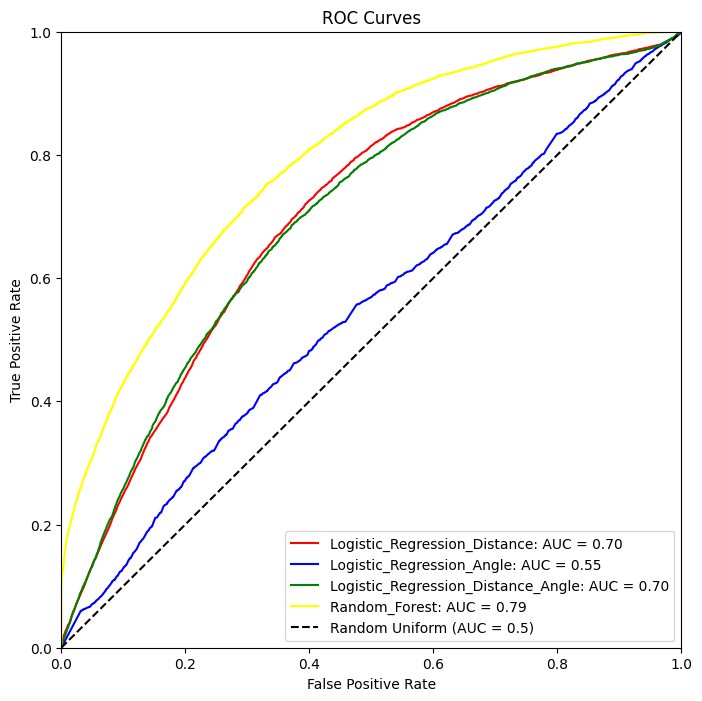

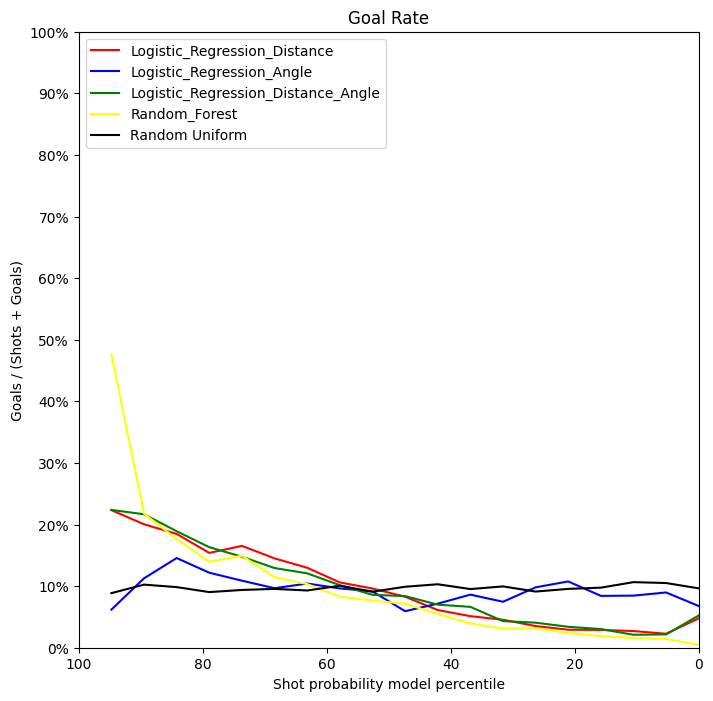

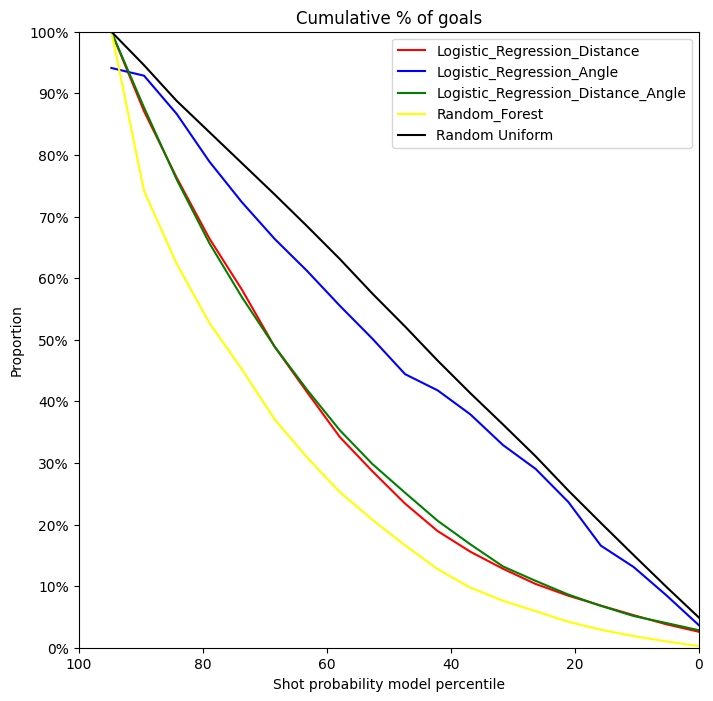

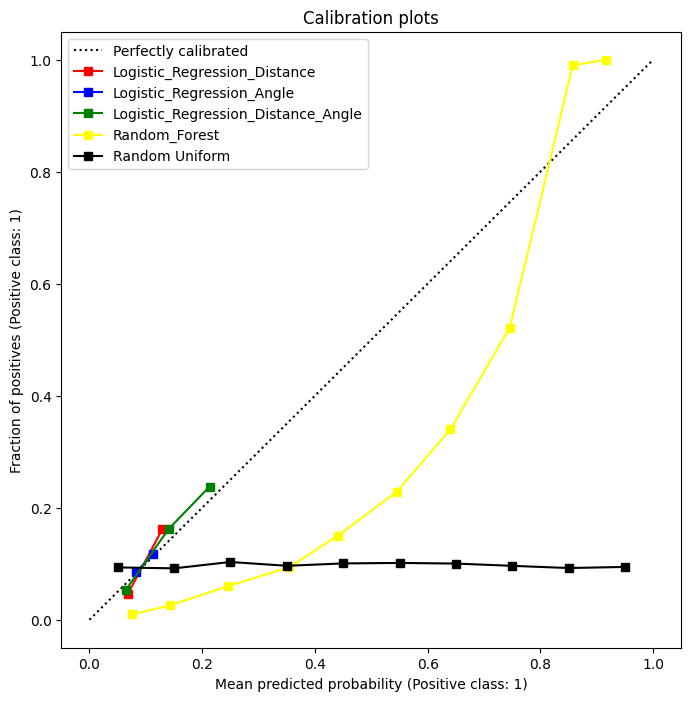

In [15]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', X_test_distance, features_data['Is Goal']),
               (clf_angle, 'Logistic_Regression_Angle', X_test_angle,  features_data['Is Goal']),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', X_test_distance_angle, features_data['Is Goal']),
               (clf_random_forest, 'Random_Forest',X_test_all, y_test)]


VizManager.plot_all_figures(classifiers, plot_name="Q7_Regular", add_random=True)

In [16]:
# Test the Logistic Regression models on 2019 / Playoffs
season_year = 2019
season_type = "Playoffs"    
features_data = FeaturesManager.build_features([season_year], season_type, with_player_stats=True, with_strength_stats=True)
# We take the absolute value, for symmetry reasons
features_data['Shot angle'] = features_data['Shot angle'].abs()
y_test = features_data['Is Goal']

X_test_distance = features_data[['Shot distance']]
print(classification_report(y_test, clf_distance.predict(X_test_distance)))

X_test_angle = features_data[['Shot angle']]
X_test_angle = X_test_angle.abs()

print(classification_report(y_test, clf_angle.predict(X_test_angle)))

X_test_distance_angle = features_data[['Shot distance', 'Shot angle']]
X_test_distance_angle['Shot angle'] = X_test_distance_angle['Shot angle'].abs()
print(classification_report(y_test, clf_distance_angle.predict(X_test_distance_angle)))

X_test_all = features_data.drop(labels=['Is Goal'], axis=1)
print(classification_report(y_test, clf_random_forest.predict(X_test_all)))




              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4346
         1.0       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4346
         1.0       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      4346
         1.0       0.00      0.00      0.00       428

    accuracy                           0.91      4774
   macro avg       0.46      0.50      0.48      4774
weighted avg       0.83      0.91      0.87      4774



/tmp/ipykernel_4305/232845574.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_distance_angle['Shot angle'] = X_test_distance_angle['Shot angle'].abs()


              precision    recall  f1-score   support

         0.0       0.93      0.97      0.94      4346
         1.0       0.37      0.21      0.27       428

    accuracy                           0.90      4774
   macro avg       0.65      0.59      0.61      4774
weighted avg       0.88      0.90      0.88      4774



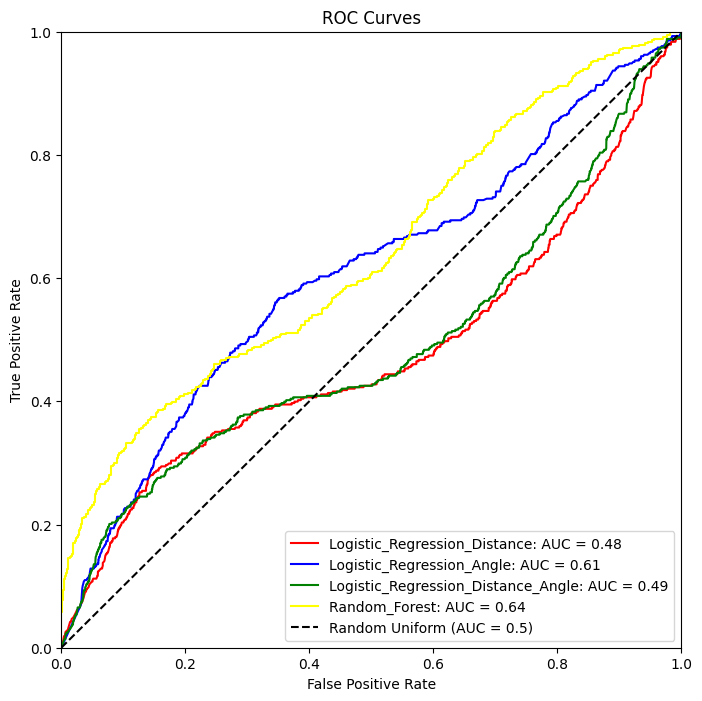

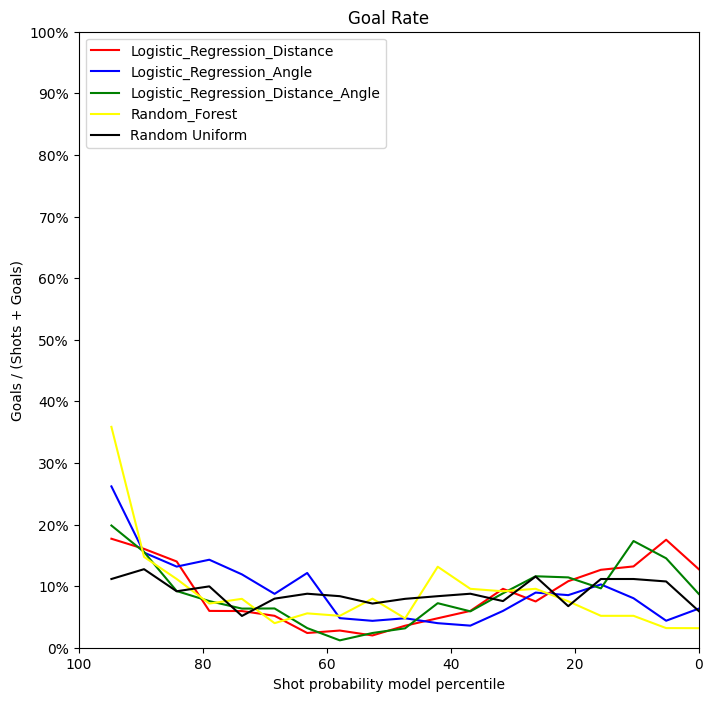

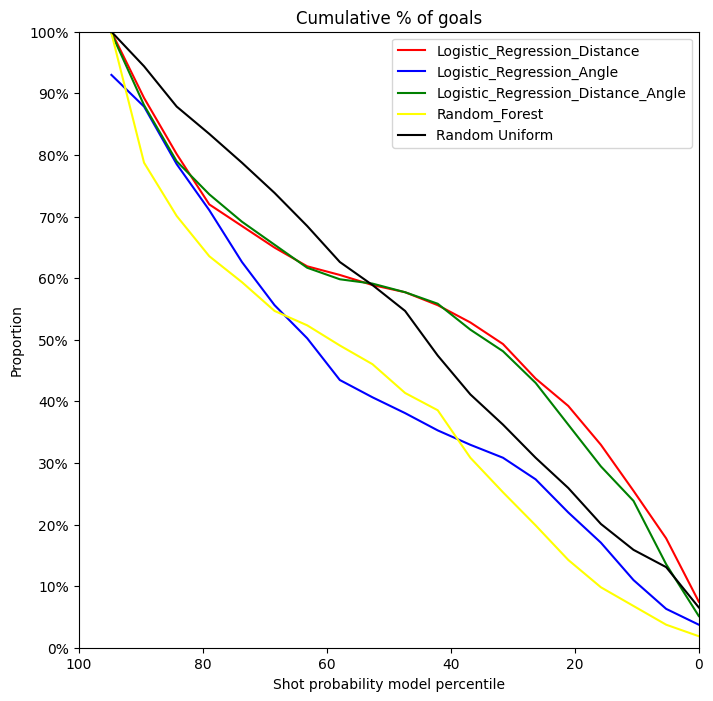

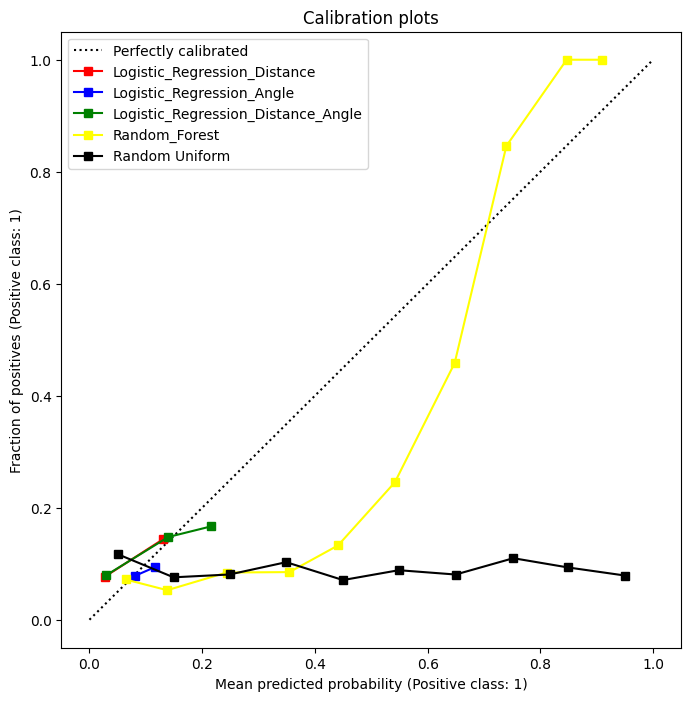

In [18]:
classifiers = [(clf_distance, 'Logistic_Regression_Distance', X_test_distance, features_data['Is Goal']),
               (clf_angle, 'Logistic_Regression_Angle', X_test_angle,  features_data['Is Goal']),
               (clf_distance_angle, 'Logistic_Regression_Distance_Angle', X_test_distance_angle, features_data['Is Goal']),
               (clf_random_forest, 'Random_Forest',X_test_all, y_test)]


VizManager.plot_all_figures(classifiers, plot_name="Q7_Playoffs", add_random=True)